# AMAZON ALEXA REVIEW RATINGS ANALYSIS


# DATA OVERVIEW

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews


# IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')


In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# VISUALIZING THE DATA

In [7]:
positive = df_alexa[df_alexa['feedback']==1]

In [8]:
negative = df_alexa[df_alexa['feedback']==0]

In [9]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


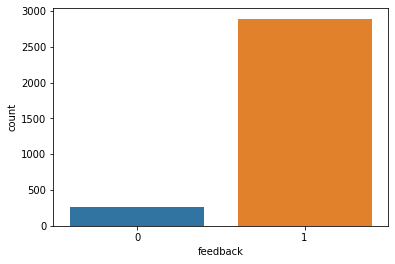

In [10]:
sns.countplot(df_alexa['feedback'], label = "Count") 

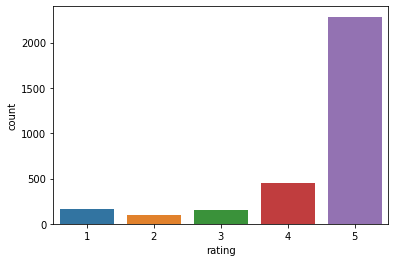

In [11]:
sns.countplot(x = 'rating', data = df_alexa)

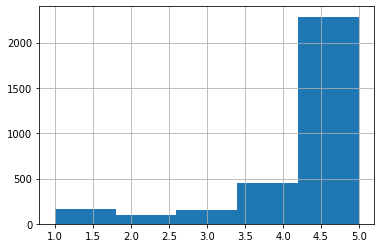

In [12]:
df_alexa['rating'].hist(bins = 5)

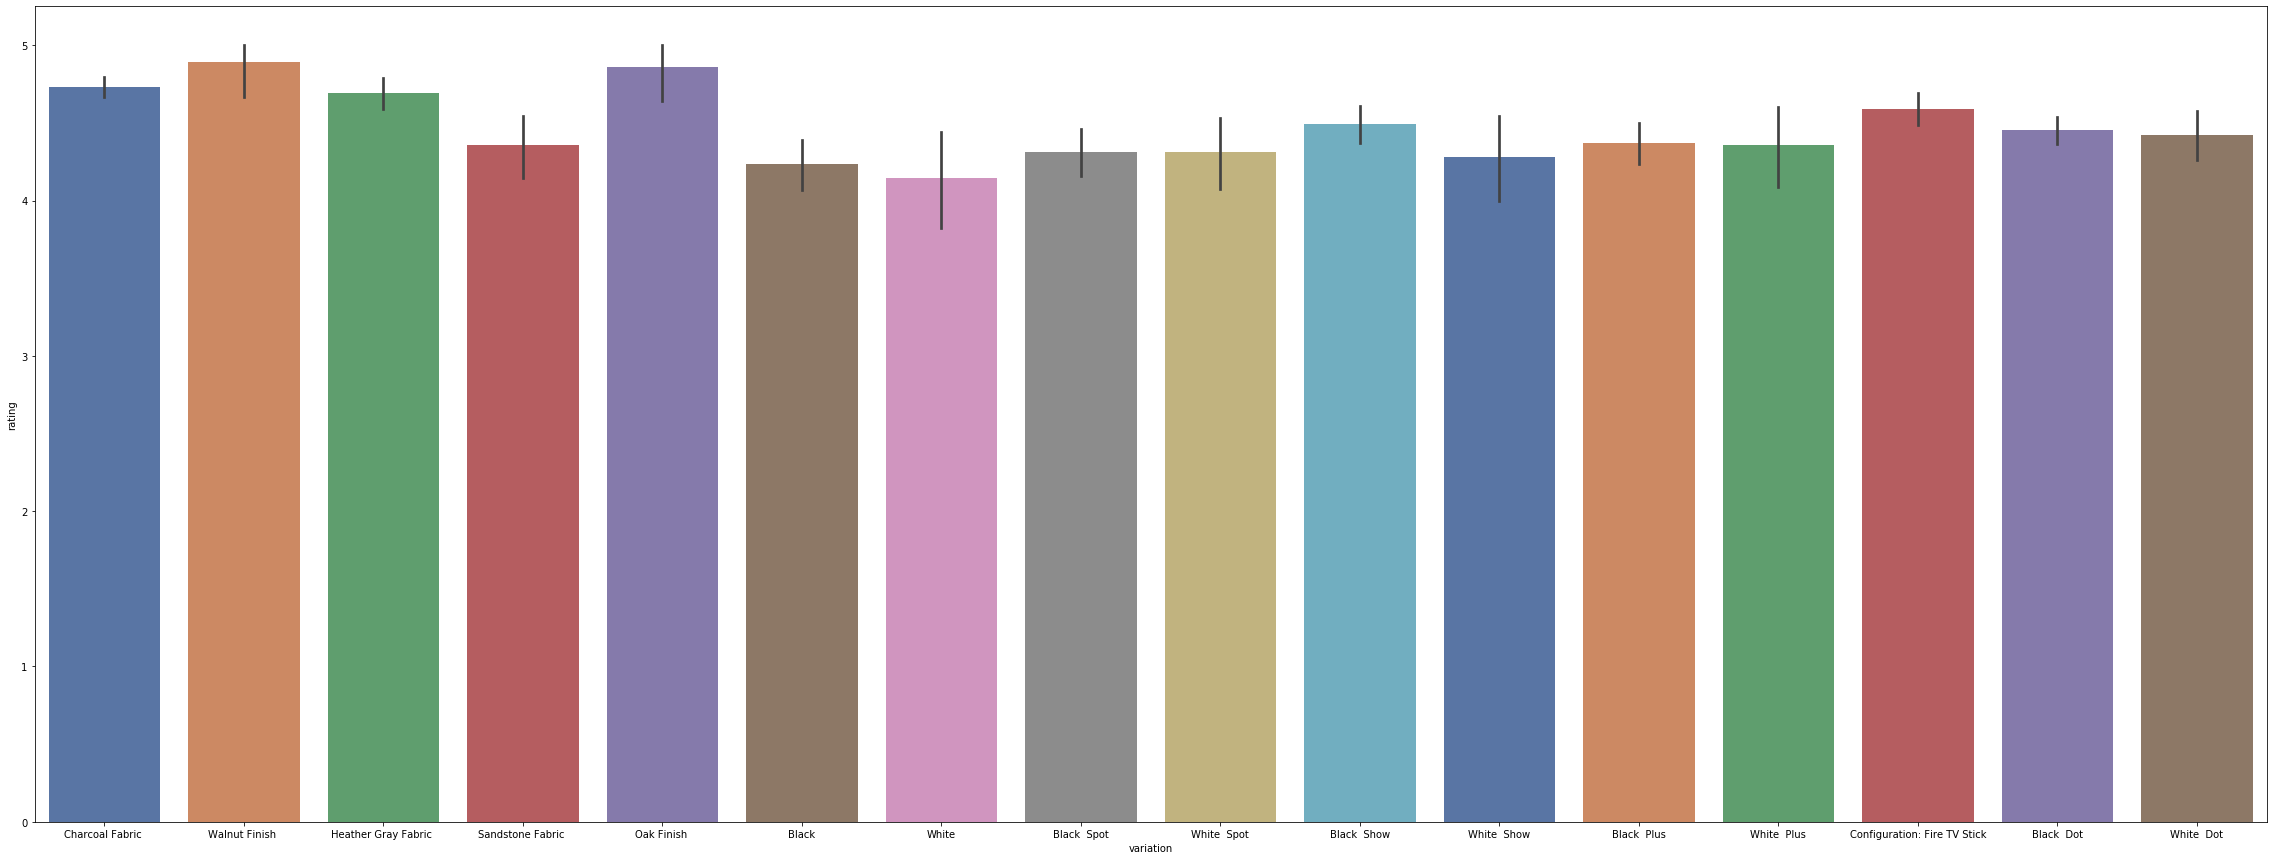

In [13]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')


# WORD CLOUD 

In [14]:
words = df_alexa['verified_reviews'].tolist()

In [15]:
len(words)

3150

In [16]:
import json
words_as_one_string =" ".join(words)

In [17]:
len(words_as_one_string)

419105

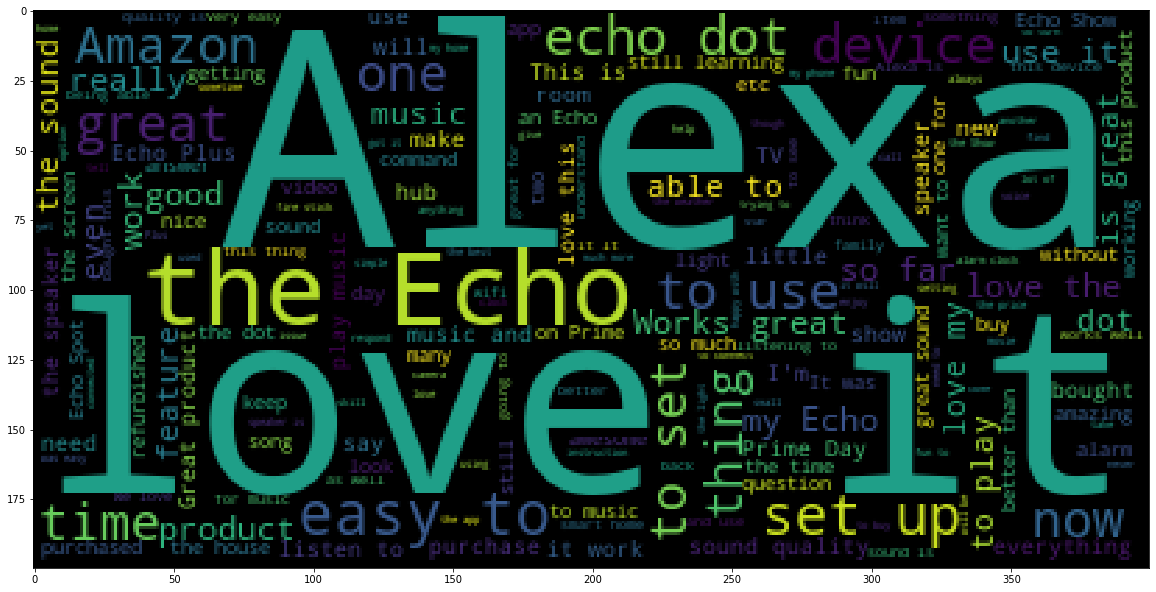

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string))

# DATA CLEANING/FEATURE ENGINEERING

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])


In [20]:
alexa_countvectorizer.shape

(3150, 4044)

In [21]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [22]:
print(vectorizer.get_feature_names()[:5])

['00', '000', '07', '10', '100']


In [23]:
print(alexa_countvectorizer.toarray()[:5])  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
word_count_array = alexa_countvectorizer.toarray()

In [25]:
word_count_array.shape

(3150, 4044)

In [26]:
word_count_array[0,:]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'We have only been using Alexa for a couple of days and are having a lot of fun with our new toy. It like having a new household member! We are trying to learn all the different featues and benefits that come with it.'

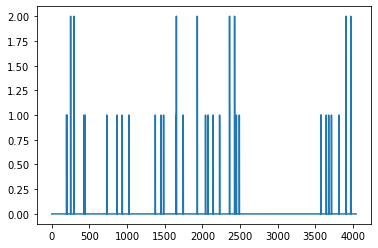

In [27]:
index = 17
plt.plot(word_count_array[index, :])
df_alexa['verified_reviews'][index]

In [28]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


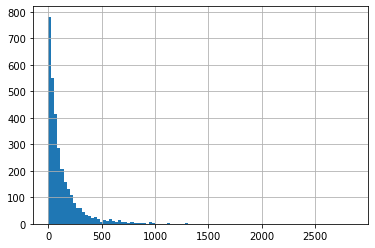

In [29]:
df_alexa['length'].hist(bins=100)


In [30]:
min_char = df_alexa['length'].min()
df_alexa[df_alexa['length'] == min_char]['verified_reviews'].iloc[0]


'😍'

In [31]:
max_char = df_alexa['length'].max()
df_alexa[df_alexa['length'] == max_char]['verified_reviews'].iloc[0]


"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import array

val =[]
sid = SentimentIntensityAnalyzer()
good,bad,neutral=0,0,0
for i,indexs in enumerate(words):
    ss = sid.polarity_scores(indexs)
    sa = sid.polarity_scores(words[i])['compound'] 
    if sa>=0:
        val.append(1)
        if(sa==0):
            neutral+=1
        else:
            good+=1
    else:
        val.append(0)
        bad+=1

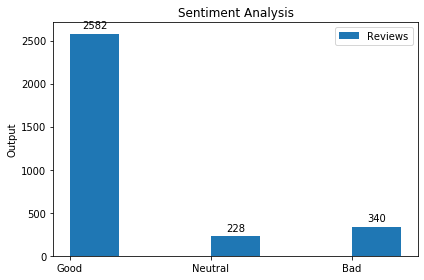

In [33]:
labels = ['Good', 'Neutral', 'Bad',]
women_means = [good, bad, neutral]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, women_means, width, label='Reviews')

ax.set_ylabel('Output')
ax.set_title('Sentiment Analysis')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)

fig.tight_layout()

plt.show()

In [34]:
right =0
for i in range(3149):
    if(val[i]==df_alexa['feedback'][i]):
        right+=1
print("Accuracy:",(right/len(val)))   

Accuracy: 0.9073015873015873
